# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- Black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the dataset

boston_df = pd.read_csv ("../data/boston_data.csv")

In [3]:
# Look at the dataset
boston_df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
# Let's summarize the data to see the distribution of data
print(boston_df.describe())

             crim          zn       indus        chas         nox         rm  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.00000   
mean     3.730912   10.509901   11.189901    0.069307    0.556710    6.30145   
std      8.943922   22.053733    6.814909    0.254290    0.117321    0.67583   
min      0.006320    0.000000    0.460000    0.000000    0.392000    3.56100   
25%      0.082382    0.000000    5.190000    0.000000    0.453000    5.90275   
50%      0.253715    0.000000    9.795000    0.000000    0.538000    6.23050   
75%      4.053158   12.500000   18.100000    0.000000    0.631000    6.62925   
max     88.976200   95.000000   27.740000    1.000000    0.871000    8.78000   

              age         dis         rad         tax     ptratio       black  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.601733    3.799666    9.836634  411.688119   18.444554  355.068243   
std     28.066143    2.109916    8.8

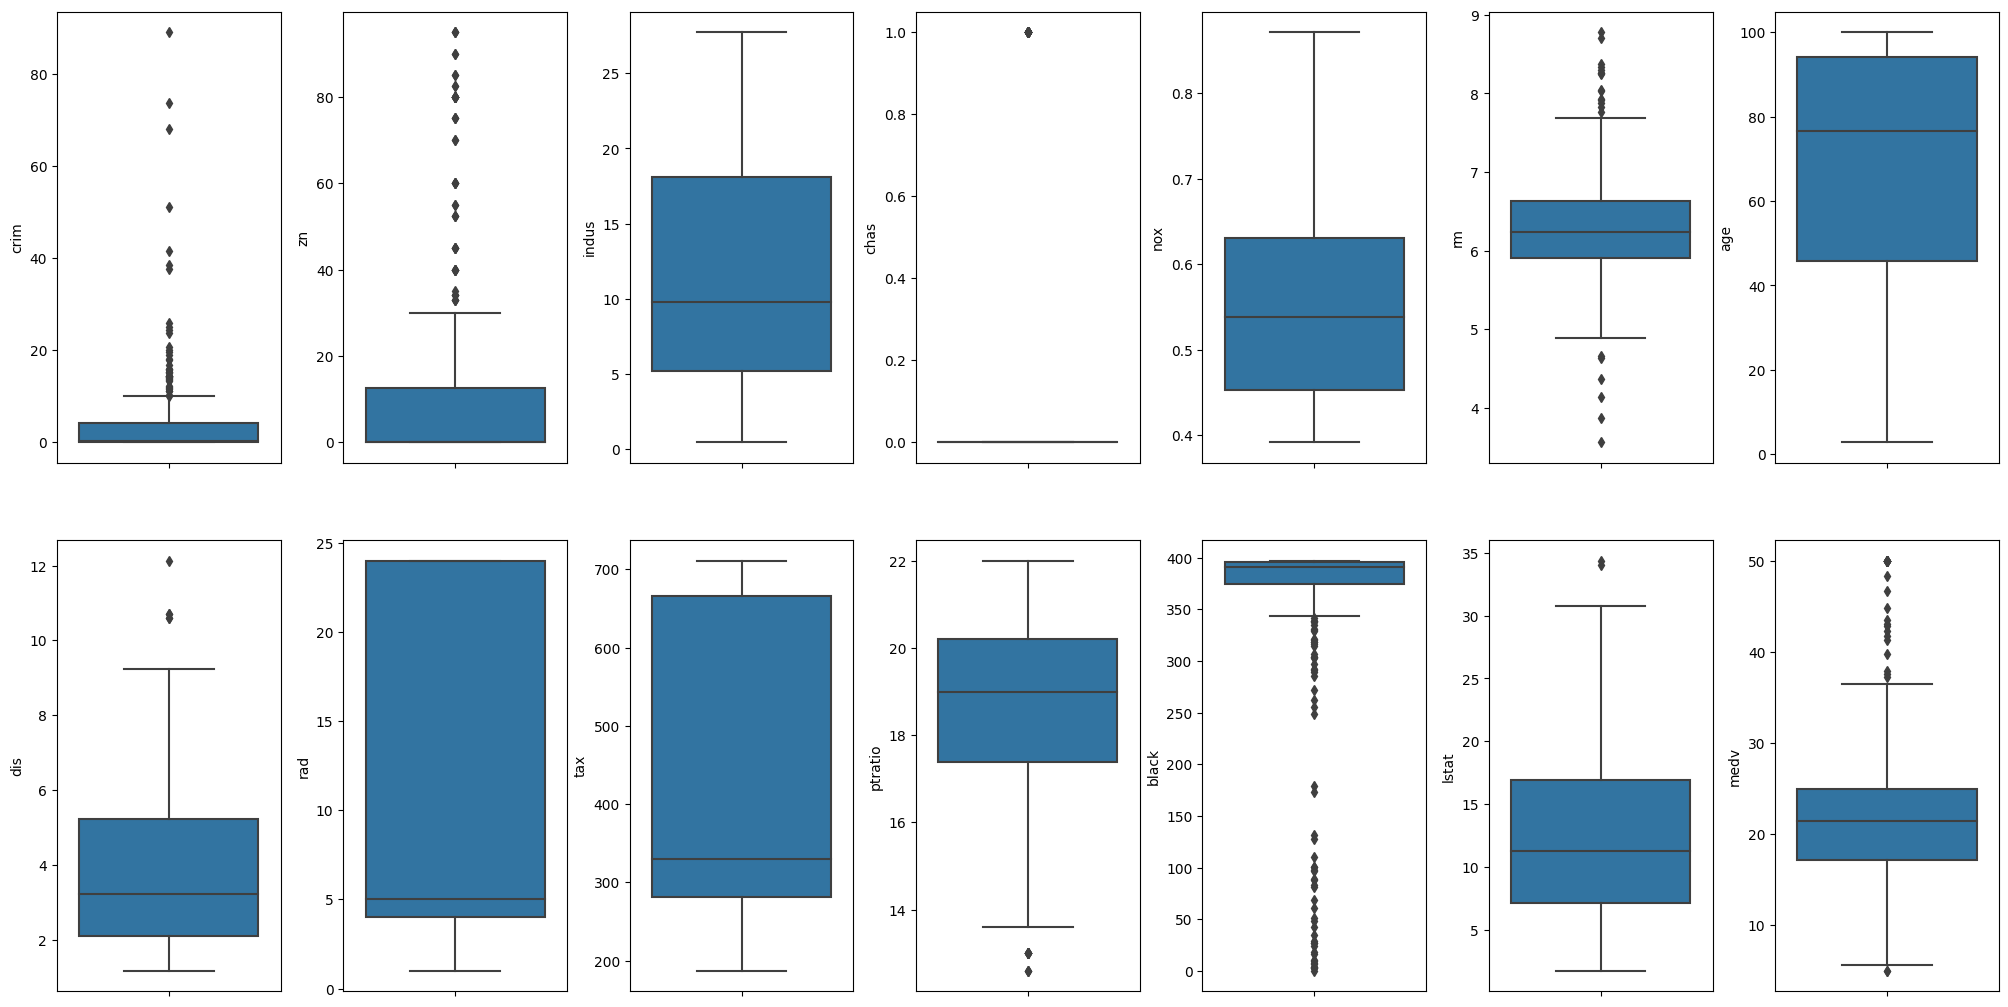

In [5]:
# Let us see the distribution of the variables in our dataset using some boxplots

from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_df.items():
    sns.boxplot(y=k, data=boston_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Variables like CRIM, ZN, RM, BLACK and MEDV seem to have several outliers.

In [6]:
    for k, v in boston_df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(boston_df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column crim outliers = 10.40%
Column zn outliers = 12.13%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.20%
Column age outliers = 0.00%
Column dis outliers = 1.24%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.97%
Column black outliers = 15.10%
Column lstat outliers = 0.50%
Column medv outliers = 6.68%


In [12]:
# Calculate quartiles and IQR
q1 = boston_df['medv'].quantile(0.25)
q3 = boston_df['medv'].quantile(0.75)
irq = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * irq
upper_bound = q3 + 1.5 * irq

# Create a boolean mask to identify outlier values
outliers_mask = (boston_df['medv'] < lower_bound) | (boston_df['medv'] > upper_bound)

# Filter DataFrame to get a dataframe of outliers and one without outliers
outliers_df = boston_df[outliers_mask]
boston_df_nout = boston_df[~outliers_mask]

In [8]:
# We check for null values

boston_df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

C:\Users\gelorminim\AppData\Local\Temp\ipykernel_2608\2449091979.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\gelorminim\AppData\Local\Temp\ipykernel_2608\2449091979.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\gelorminim\AppDat

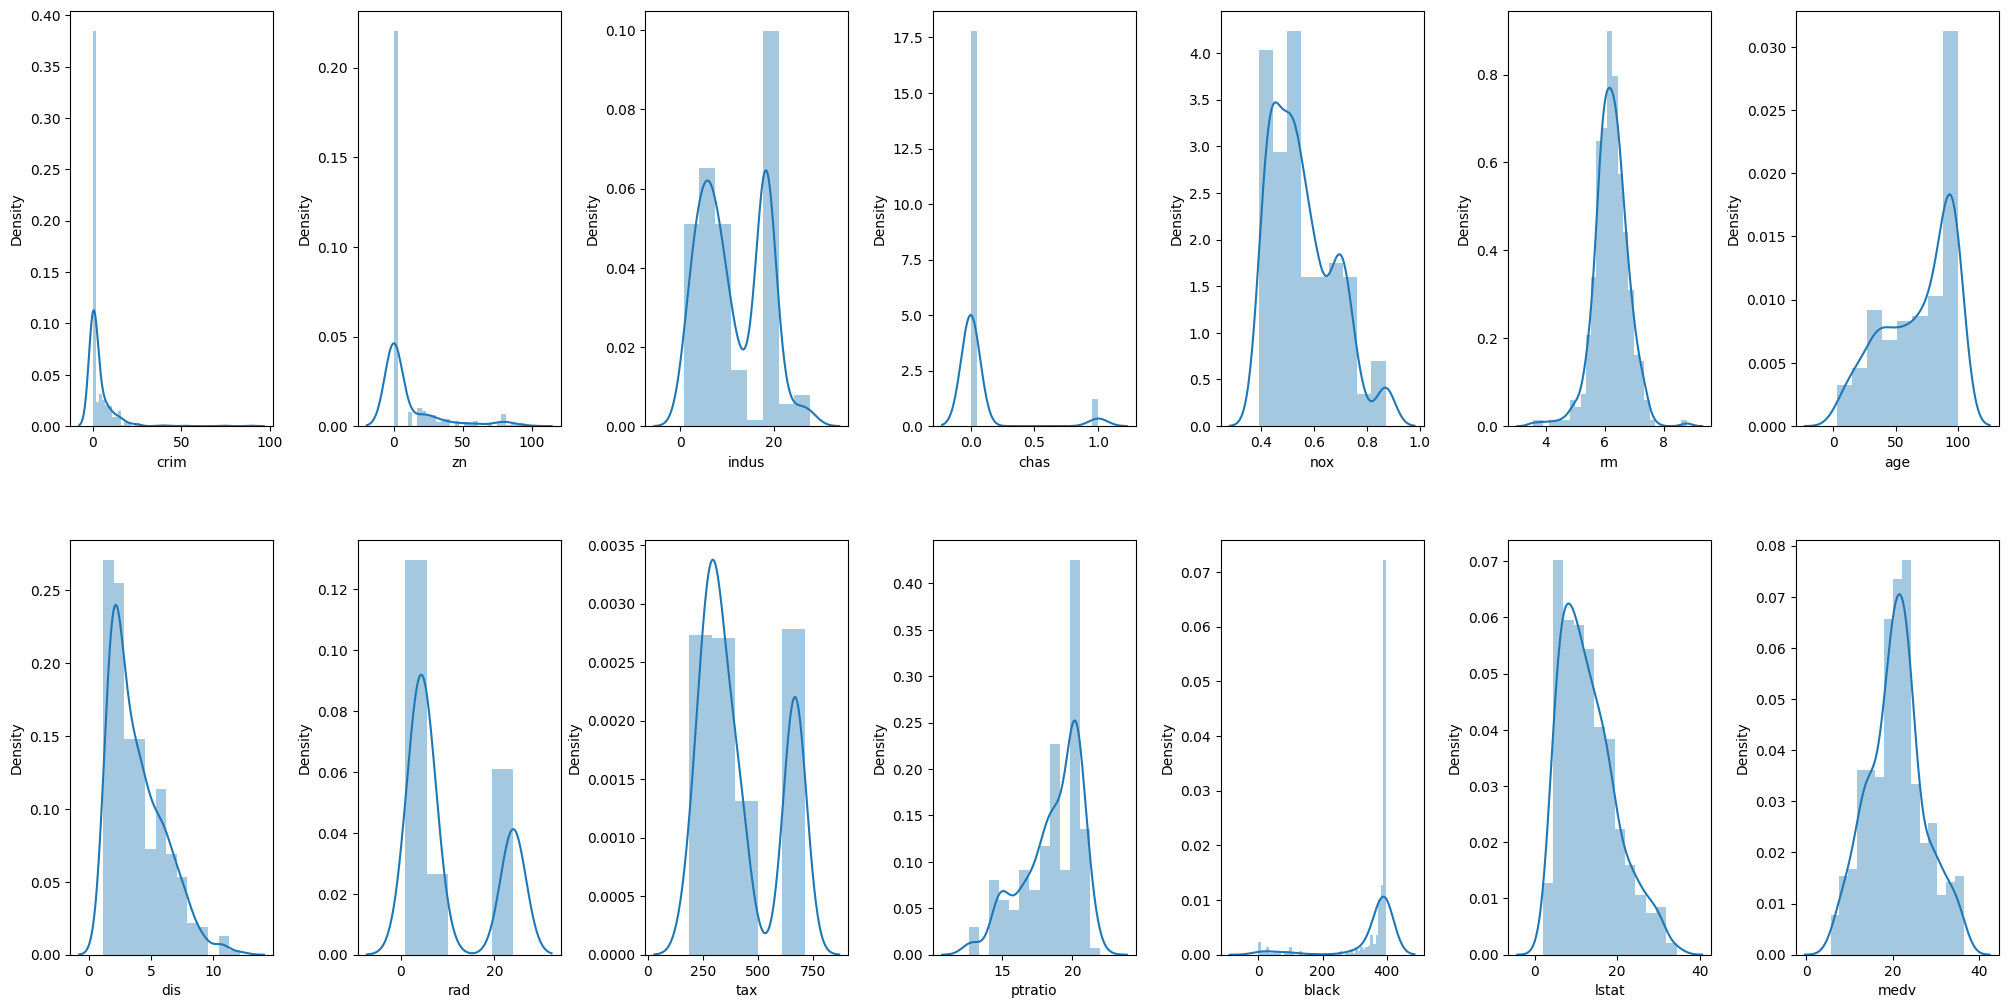

In [13]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_df_nout.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Next, we want to explore the data. Pick several variabables you think will be best correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

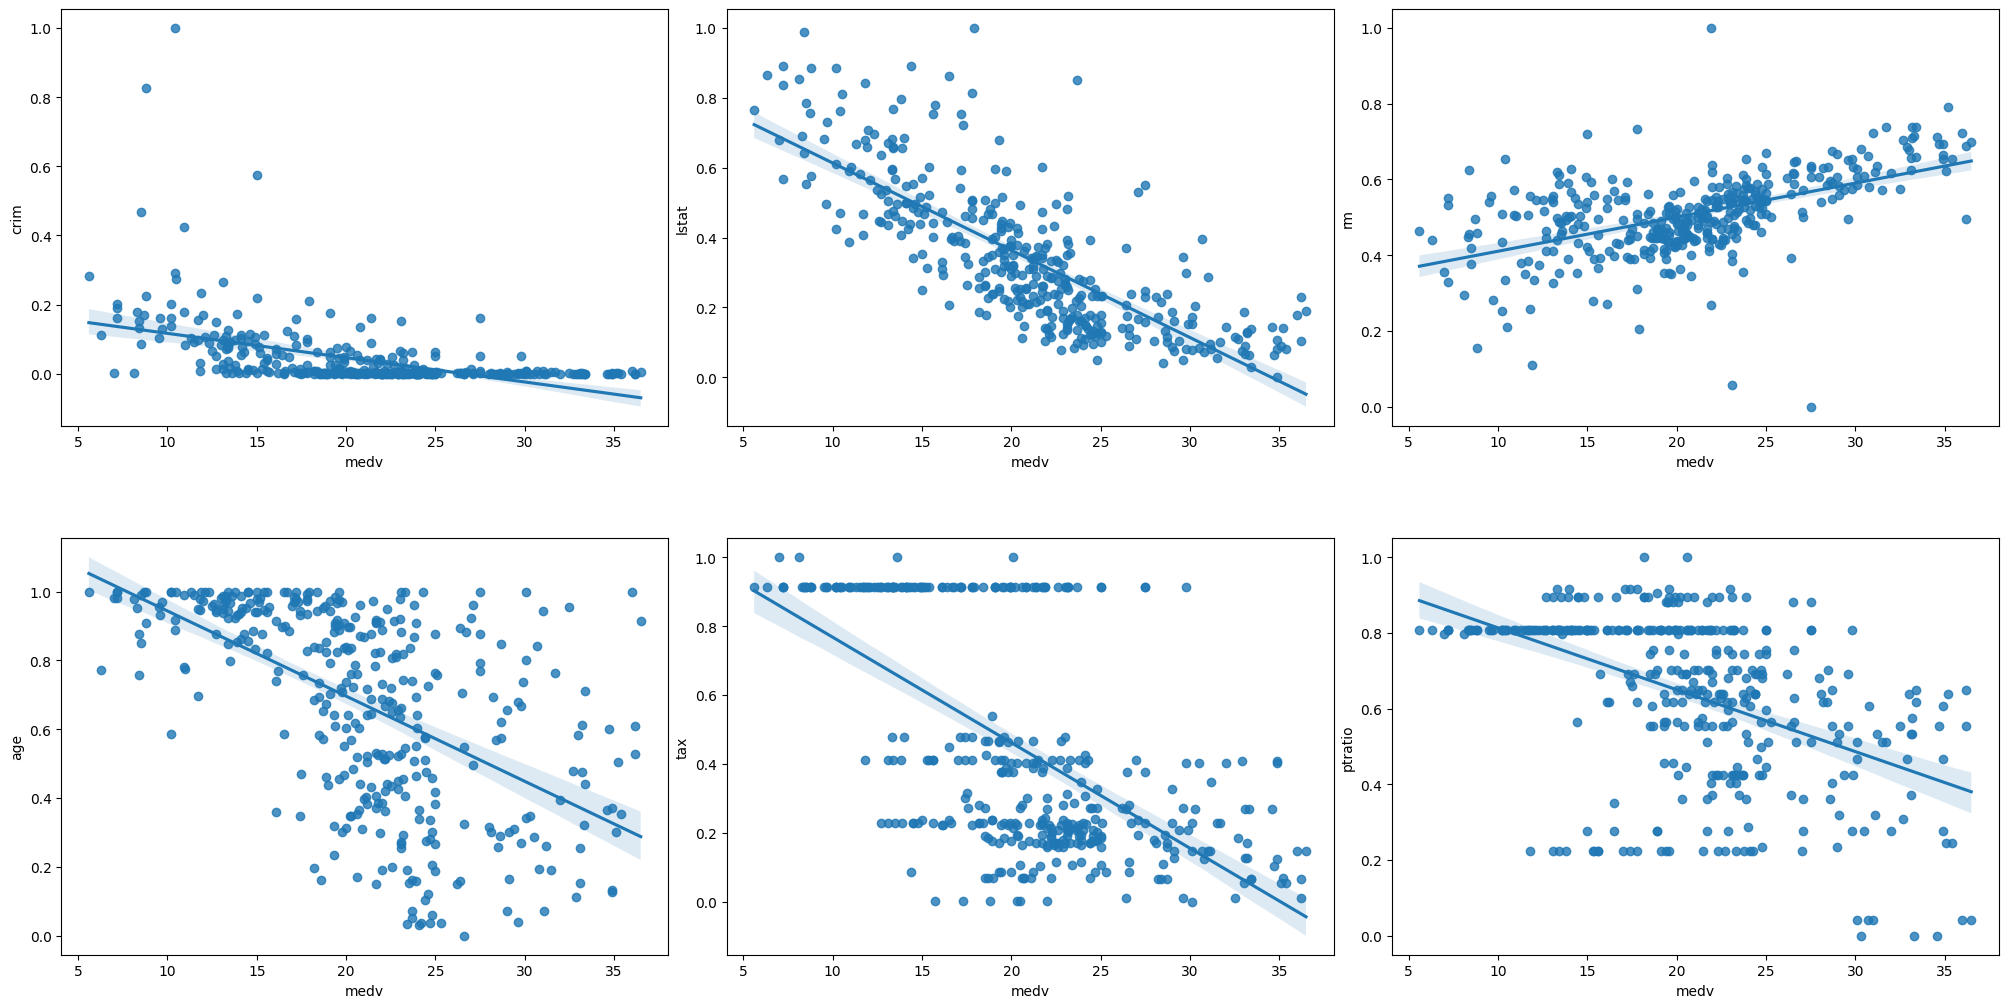

In [14]:
from sklearn import preprocessing

# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['crim', 'lstat', 'rm', 'age', 'tax', 'ptratio']
x = boston_df_nout['medv']  # Using 'medv' as x
y = boston_df_nout.loc[:, column_sels]
y_scaled = pd.DataFrame(data=min_max_scaler.fit_transform(y), columns=column_sels)

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for i, k in enumerate(column_sels):
    sns.regplot(x=x, y=y_scaled[k], ax=axs[i])  # Swap x and y here

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()



### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

Of the variables selected above, the % lower status of the population and the average number of rooms per dwelling seem to have a clear linear relationship with median value of owner-occupied homes, while for full-value property-tax rate and pupil-teacher ratio by town this relationship is more spurious.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

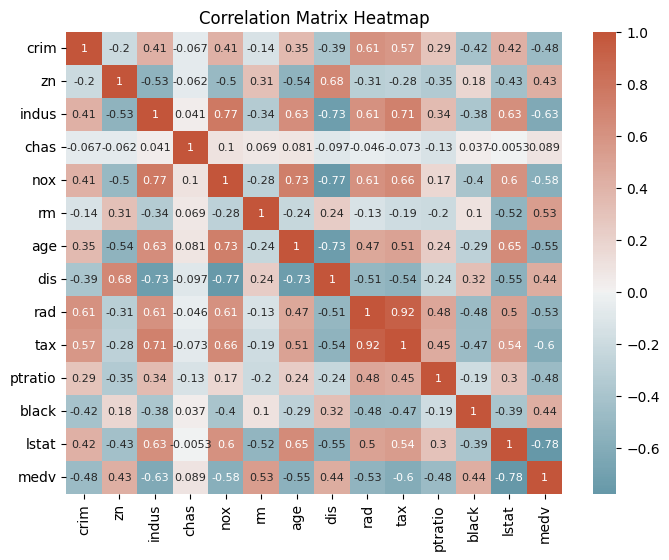

In [22]:
correlation_matrix = boston_df_nout.corr()

custom_palette = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, center=0, annot_kws={"size": 8})
plt.title("Correlation Matrix Heatmap")
plt.show()

Looking at the heatmap with the correlation values above, we could consider adding NOX - nitric oxides concentration (parts per 10 million) - and INDUS - proportion of non-retail business acres per town.

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [23]:
boston_df_nout['medv'].describe()

count    377.000000
mean      20.841379
std        6.449545
min        5.600000
25%       16.600000
50%       20.900000
75%       24.200000
max       36.500000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance metric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [24]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [25]:
from sklearn.model_selection import train_test_split

column_sels = ['crim', 'lstat', 'rm', 'age', 'tax', 'ptratio', 'nox', 'indus']
y = boston_df_nout['medv']
X = boston_df_nout.loc[:, column_sels]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [60]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

max_depth_values = [1,2, 4, 6, 8, 10]
train_scores = []
test_scores = []
cv_scores = []

for max_depth in max_depth_values:
    random_forest = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=1)
    
    # Cross-validation scores
    cv_score = np.mean(cross_val_score(random_forest, X_train, y_train, cv=3))
    cv_scores.append(cv_score)
    
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    train_score = random_forest.score(X_train, y_train)
    test_score = random_forest.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

Now, plot the score for each tree on the training set and on the testing set.

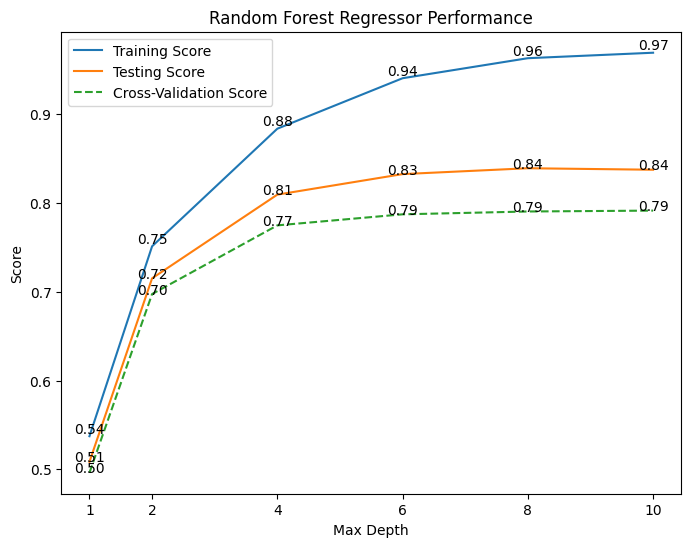

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, train_scores, label='Training Score')
plt.plot(max_depth_values, test_scores, label='Testing Score')
plt.plot(max_depth_values, cv_scores, label='Cross-Validation Score', linestyle='dashed')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Random Forest Regressor Performance')
plt.legend()

for i, (train_score, test_score, cv_score) in enumerate(zip(train_scores, test_scores, cv_scores)):
    plt.text(max_depth_values[i], train_score, f'{train_score:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(max_depth_values[i], test_score, f'{test_score:.2f}', ha='center', va='baseline', fontsize=10)
    plt.text(max_depth_values[i], cv_score, f'{cv_score:.2f}', ha='center', va='baseline', fontsize=10)

plt.xticks(max_depth_values)
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

* The depth of the model (max_depth) refers to the size of the tree, meaning the number of splits of the tree. The higher the depth, the more information about the data it takes into account. At the same time, the higher the depth the higher the risk of overfitting. In fact, in the plot above, we can see that the higher the depth, the higher the score obtained in the training dataset - probably bordering overfitting - with little to no gain in terms of accuracy in the test dataset - once passed a max_depth=6.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

* When the model is trained with a maximum depth of 1, it is certainly underfitting, having high bias and low variance. The accuracy score is around 50%, a poor one, just as good as random chance. When the model is trained with a maximum depth of 10, instead, it swings towards overfitting, with low bias and high variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

* Based on the results obtained previously, the optimal max_depth parameter is 6.



### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

Asnwers:

* Data collected in 1978 cannot be considered representative of today's situation
* The choice of features is dubious, since some relevant characteristics of a house are missing - for example, the square footage, the age of the house, or if any renovations was done.
* The model contains less than 500 observation, and it does not seem to be robust enough to make consistent predictions - this consistency would be provided by having additional data.
* Data collected for an urban city like Boston could not be applicable to a rural city - compare likes with likes.